## Movie rating prediction - Codsoft task 2

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### read data

In [106]:
df = pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\IMDb Movies India.csv",encoding='latin-1')

In [107]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### analyse and clean data

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [109]:
df.shape

(15509, 10)

In [110]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [111]:
# Handling the null values
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [112]:
df.isnull().sum()


Name         0
Year         0
Duration     0
Genre       29
Rating       0
Votes        0
Director     0
Actor 1      0
Actor 2      0
Actor 3      0
dtype: int64

In [113]:
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df.dropna(subset=['Rating','Votes'],inplace=True)

In [89]:
# Dropping the duplicated values 
df = df.drop_duplicates(subset=['Name'], keep=False)


In [100]:
df['Director'].fillna(df['Director'].mode()[0], inplace=True)
df['Actor 1'].fillna(df['Actor 1'].mode()[0], inplace=True)
df['Actor 2'].fillna(df['Actor 2'].mode()[0], inplace=True)
df['Actor 3'].fillna(df['Actor 3'].mode()[0], inplace=True)

In [114]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [115]:
df.shape

(5688, 10)

In [116]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5688 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5688 non-null   object 
 1   Year      5688 non-null   object 
 2   Duration  5688 non-null   object 
 3   Genre     5688 non-null   object 
 4   Rating    5688 non-null   float64
 5   Votes     5688 non-null   object 
 6   Director  5688 non-null   object 
 7   Actor 1   5688 non-null   object 
 8   Actor 2   5688 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), object(9)
memory usage: 488.8+ KB


In [117]:
df['Year'] = df['Year'].astype('int')
df['Duration'] = df['Duration'].astype('int')
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5688 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5688 non-null   object 
 1   Year      5688 non-null   int32  
 2   Duration  5688 non-null   int32  
 3   Genre     5688 non-null   object 
 4   Rating    5688 non-null   float64
 5   Votes     5688 non-null   int32  
 6   Director  5688 non-null   object 
 7   Actor 1   5688 non-null   object 
 8   Actor 2   5688 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 422.2+ KB


In [118]:
df.describe()

,Year,Duration,Rating,Votes
count,5688.000000,5688.000000,5688.000000,5688.000000
mean,1996.037623,133.486639,5.900738,2683.977848
std,19.977576,25.312671,1.379355,13617.991770
min,1931.000000,21.000000,1.100000,5.000000
25%,1982.000000,119.000000,5.000000,30.000000
50%,2001.000000,135.000000,6.100000,128.000000
75%,2013.000000,150.000000,6.900000,910.750000
max,2021.000000,321.000000,10.000000,591417.000000


In [121]:
# Find the row with the highest number of votes
max_votes= imdb[imdb['Votes'] == imdb['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highvotes = max_votes['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highvotes = max_votes['Votes'].values[0]

print("Movie with the highest votes:", movie_highvotes)
print("Number of votes for the movie with the highest votes:", votes_highvotes)
print('\n', '='*100, '\n')


# Find the row with the lowest number of votes
min_votes= imdb[imdb['Votes'] == imdb['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowvotes = min_votes['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_lowvotes = min_votes['Votes'].values[0]
print("Movie with the highest votes:", movie_lowvotes)
print("Number of votes for the movie:", votes_lowvotes)


Movie with the highest votes: Satyam Shivam Sundaram: Love Sublime
Number of votes for the movie with the highest votes: 999


Movie with the highest votes: 15 Park Avenue
Number of votes for the movie: 1,002


### data visualization

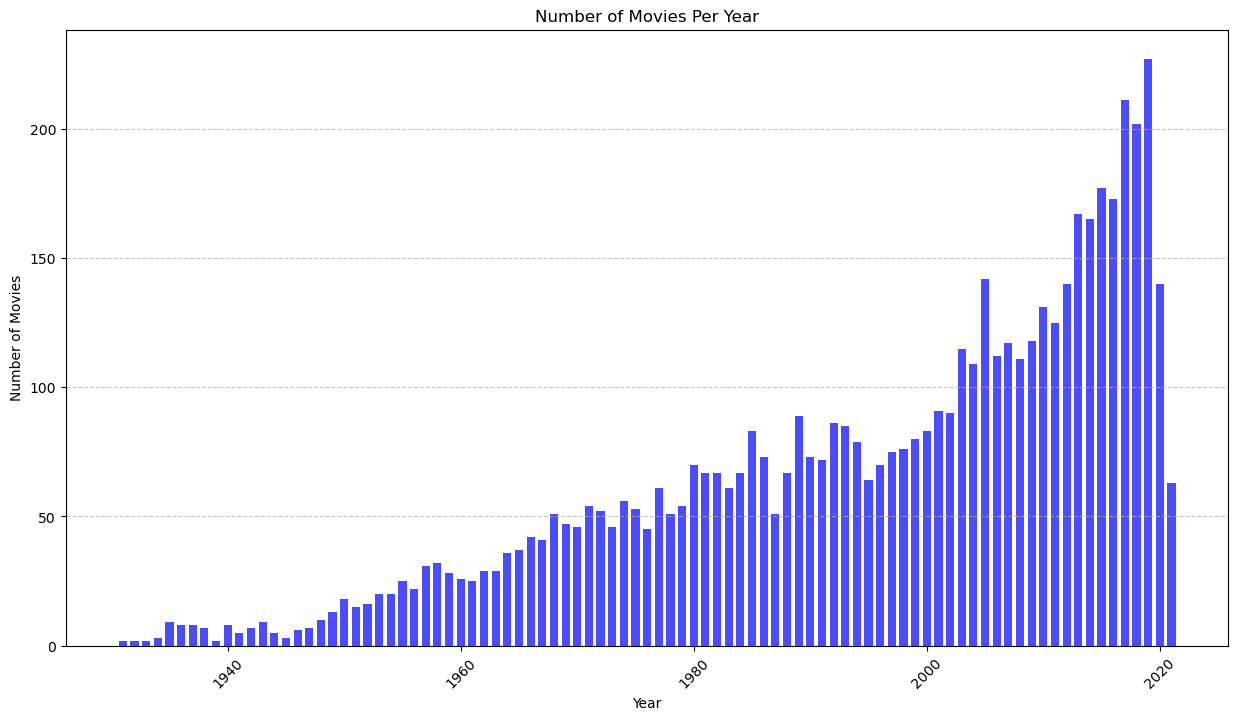

In [123]:
# Calculate the number of movies per year
year_counts = df['Year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(15, 8))
plt.bar(year_counts.index, year_counts.values, width=0.7, align='center', color='b', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Per Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


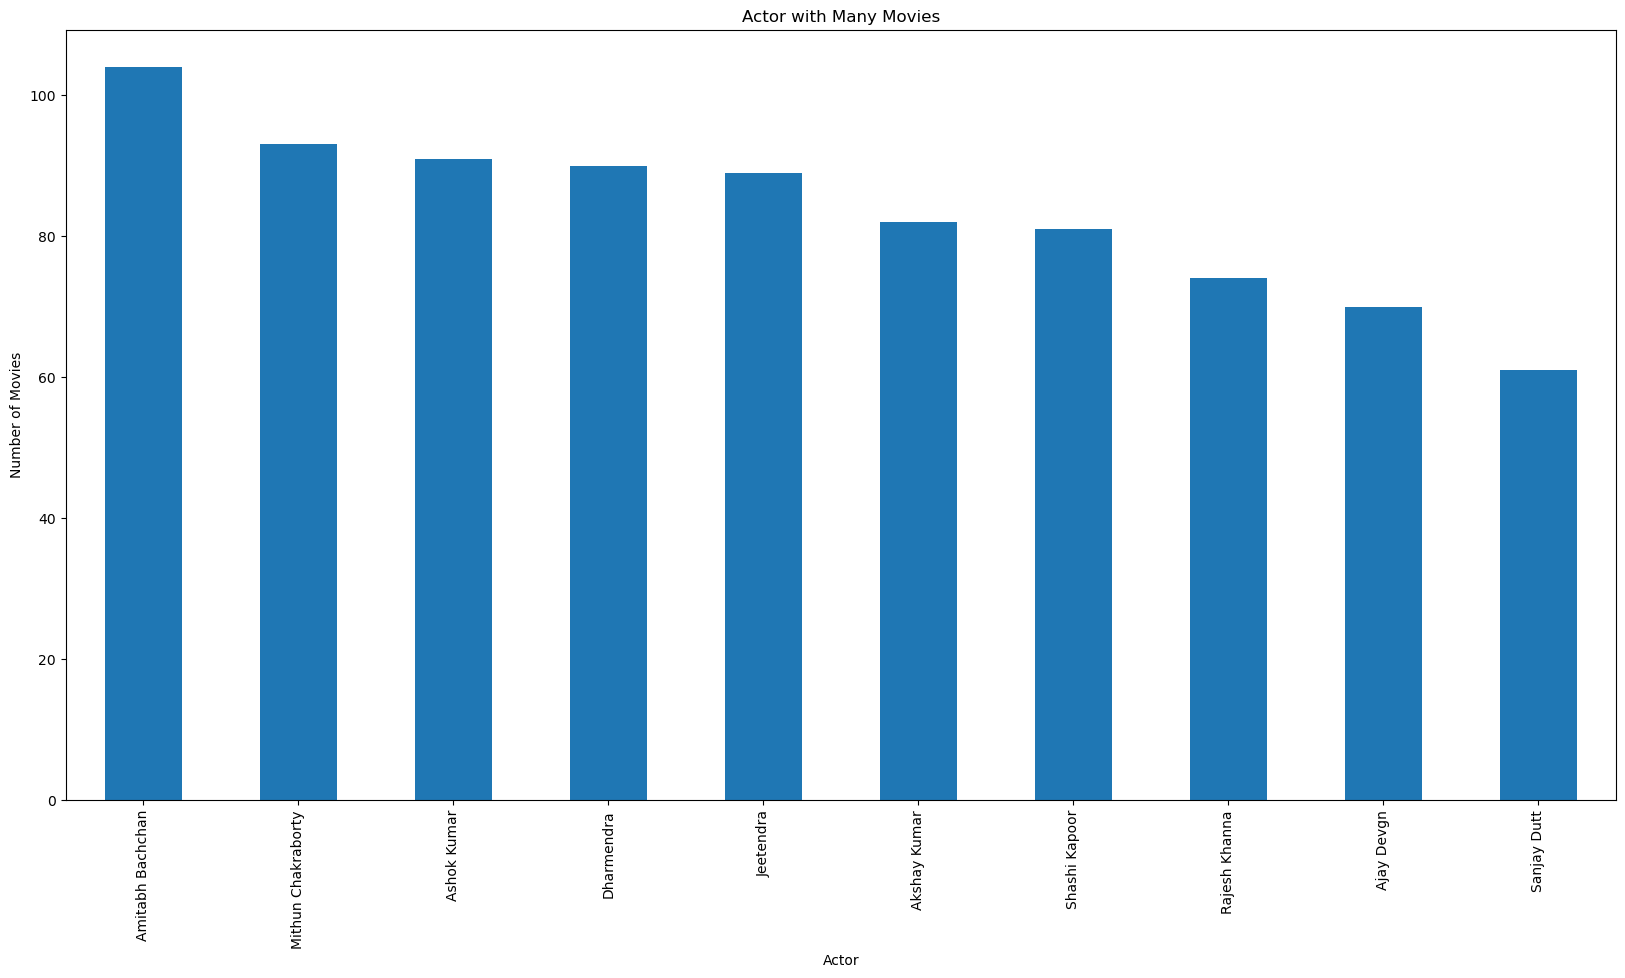

In [122]:
# Calculate the top 10 actors with the most movies
top_actors = df['Actor 1'].value_counts().sort_values(ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(20, 10))
top_actors.plot(kind='bar')
plt.title('Actor with Many Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')

plt.show()


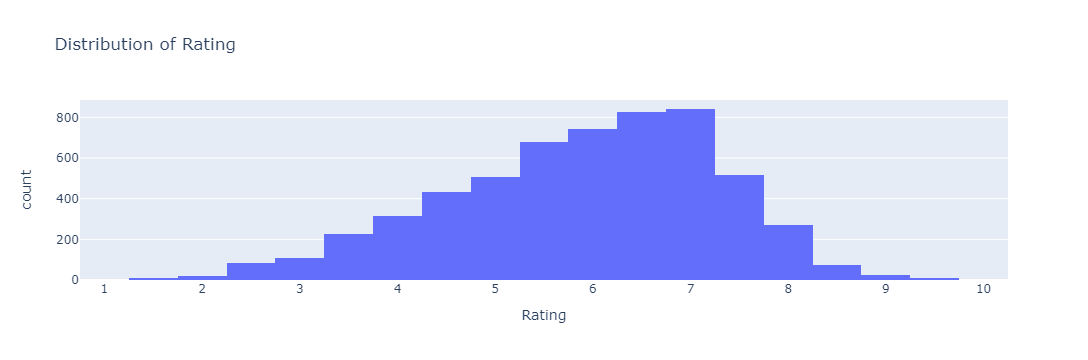

In [126]:
import plotly.express as px
fig = px.histogram(df, x='Rating', nbins=40, title='Distribution of Rating')
fig.show()


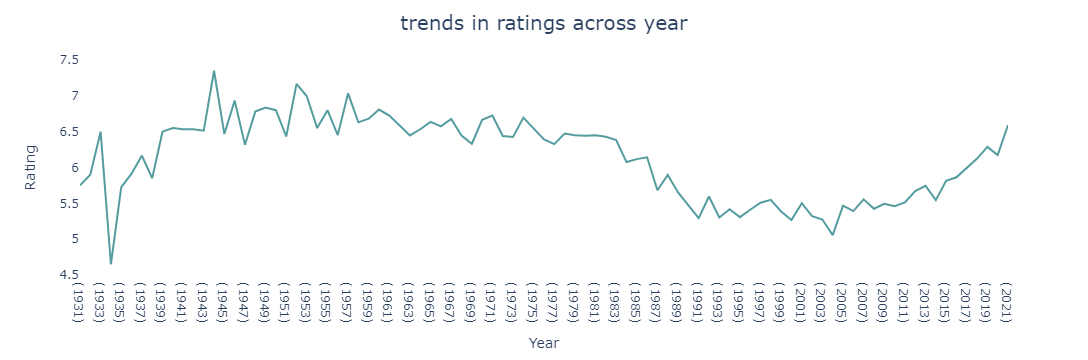

In [151]:
# Group data by Year and calculate the average rating
average_rating_by_year = imdb.groupby('Year')['Rating'].mean().reset_index()
# Create the line plot
import plotly.express as px
fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='trends in ratings across year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()


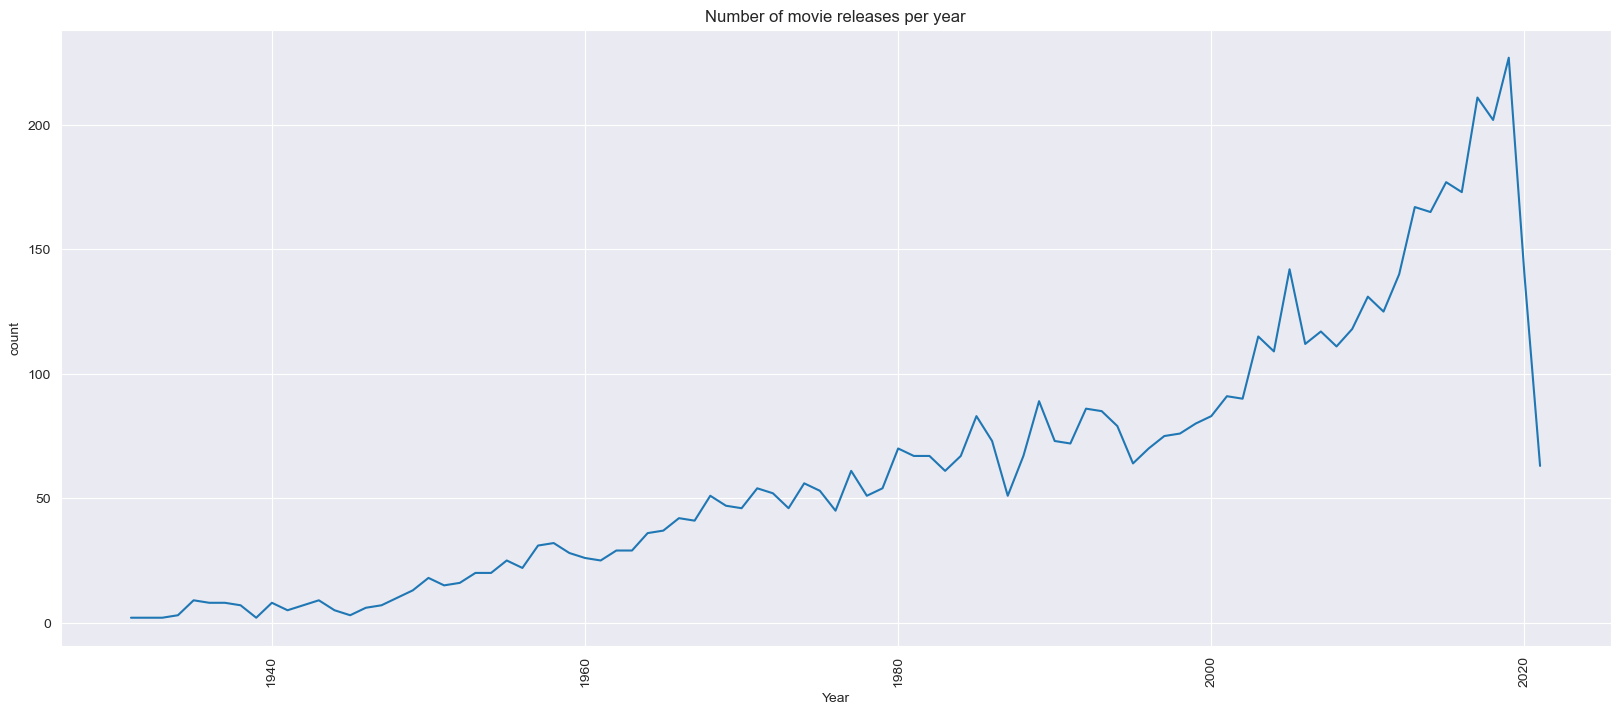

In [154]:
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()

plt.figure(figsize=(20,8))
ax = sns.lineplot(data=year_count, x='Year', y='count')
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

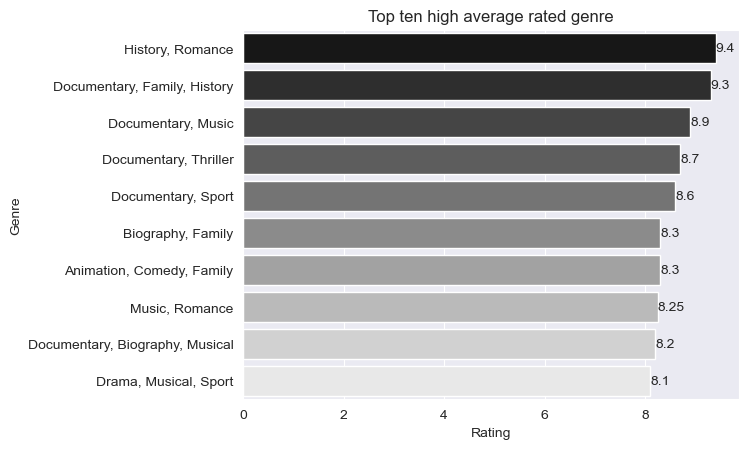

In [155]:
# plot top ten high average rated genre 
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='gist_gray')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

### training model

In [160]:
#encoding 'Genre' based on frequency
genre_counts = df['Genre'].value_counts()
df['Genre_encoded'] = df['Genre'].map(genre_counts)
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating
actor_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor_encoded'] = actor_mean_rating

In [166]:
X = df[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Root Mean Squared Error: 0.7243100330021647
Coefficient of determination:  0.7322964922570245


In [164]:
X = df[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = df['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))

Mean squared error:  0.5246250239075969
Mean absolute error:  0.52021459605299
R2 score:  0.6924229076937325


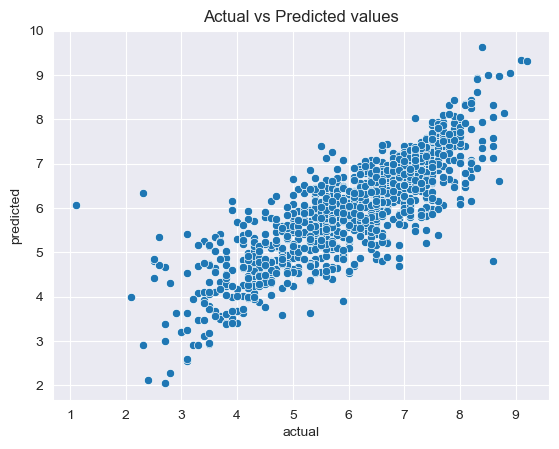

In [168]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred.ravel(),
                        'residual': y_test - y_pred}
                      )
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()
